In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn.functional as F
from torchsummary import summary
from torch.utils.data import DataLoader
torch.__version__

'2.0.0+cu118'

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
]) 
Batch_Size = 64
transform_test = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])

In [3]:
trainset = datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
testset = datasets.CIFAR10(root='./data',train=False,download=True, transform=transform_test)
batch_size = 64
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,shuffle=True, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [9]:
from VisionTransformer import VisionTransformer
from CNN import Net
def vit_cifar_patch_32(num_classes: int = 10):
    model = VisionTransformer(img_size=32,
                              num_classes = num_classes,
                              patch_size=16,
                              embed_dim=768,
                              num_layers=1,
                              heads=16)
    if torch.cuda.is_available():
        model = model.cuda()
    return model

def vit_cifar_patch_32_no_add_position_embedding(num_classes: int = 10):
    model = VisionTransformer(img_size=32,
                              num_classes = num_classes,
                              patch_size=16,
                              embed_dim=768,
                              num_layers=1,
                              heads=16,
                              add_position_embedding = False)
    if torch.cuda.is_available():
        model = model.cuda()
    return model

def vit_cifar_patch_32_no_cls(num_classes: int = 10):
    model = VisionTransformer(img_size=32,
                              num_classes = num_classes,
                              patch_size=16,
                              embed_dim=768,
                              num_layers=1,
                              heads=16,
                              classifier='gap')
    if torch.cuda.is_available():
        model = model.cuda()
    return model

def cnn():
    model = Net()
    if torch.cuda.is_available():
        model = model.cuda()
    return model

In [5]:
from torchinfo import summary
net = vit_cifar_patch_32()
summary(net,(2,3,32,32))

Layer (type:depth-idx)                             Output Shape              Param #
VisionTransformer                                  [2, 10]                   2,304
├─PatchEmbed: 1-1                                  [2, 4, 768]               --
│    └─Conv2d: 2-1                                 [2, 768, 2, 2]            590,592
│    └─LayerNorm: 2-2                              [2, 4, 768]               1,536
├─Encoder: 1-2                                     [2, 5, 768]               --
│    └─AddPositionEmbs: 2-3                        [2, 5, 768]               3,840
│    └─Dropout: 2-4                                [2, 5, 768]               --
│    └─Sequential: 2-5                             [2, 5, 768]               --
│    │    └─Encoder1DBlock: 3-1                    [2, 5, 768]               7,083,264
│    └─LayerNorm: 2-6                              [2, 5, 768]               1,536
├─Identity: 1-3                                    [2, 768]                  --
├─Linear: 1

In [10]:
epoch = 50

In [11]:
from utils import fit
fit(model = vit_cifar_patch_32(), epochs = epoch, trainloader = trainloader, testloader = testloader, save_path='Model/net.pth', save_pickle='Model/ret.pkl')

Train Epoch 7/50: 100%|██████████| 782/782 [00:14<00:00, 55.01it/s, Train Acc=0.473, Train Loss=1.48]


Epoch 00007: reducing learning rate of group 0 to 9.4000e-04.


Evaluation Epoch 50/50: 100%|██████████| 157/157 [00:01<00:00, 95.55it/s, Eval Acc=0.51, Eval Loss=3]    


In [12]:
fit(vit_cifar_patch_32_no_add_position_embedding(), epoch, trainloader, testloader, save_path='Model/net_no_postition_embeding.pth', save_pickle='Model/ret_no_postition_embeding.pkl')

Train Epoch 25/50: 100%|██████████| 782/782 [00:11<00:00, 71.07it/s, Train Acc=0.417, Train Loss=1.61]


Epoch 00025: reducing learning rate of group 0 to 9.4000e-04.


Train Epoch 32/50: 100%|██████████| 782/782 [00:12<00:00, 63.46it/s, Train Acc=0.455, Train Loss=1.51]


Epoch 00032: reducing learning rate of group 0 to 8.8360e-04.


Train Epoch 39/50: 100%|██████████| 782/782 [00:10<00:00, 71.84it/s, Train Acc=0.493, Train Loss=1.41]


Epoch 00039: reducing learning rate of group 0 to 8.3058e-04.


Evaluation Epoch 50/50: 100%|██████████| 157/157 [00:01<00:00, 95.90it/s, Eval Acc=0.422, Eval Loss=1.79] 


In [13]:
fit(vit_cifar_patch_32_no_cls(), epoch, trainloader, testloader, save_path='Model/net_no_cls.pth', save_pickle='Model/ret_no_cls.pkl')

Train Epoch 36/50:  56%|█████▌    | 438/782 [00:06<00:04, 75.24it/s, Train Acc=0.943, Train Loss=0.163]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Train Epoch 49/50: 100%|██████████| 782/782 [00:11<00:00, 69.96it/s, Train Acc=0.957, Train Loss=0.124]


Epoch 00049: reducing learning rate of group 0 to 9.4000e-04.


Evaluation Epoch 50/50: 100%|██████████| 157/157 [00:01<00:00, 97.43it/s, Eval Acc=0.536, Eval Loss=3.19] 


In [14]:
fit(cnn(), epoch, trainloader, testloader, save_path='Model/net_cnn.pth', save_pickle='Model/ret_cnn.pkl')

Evaluation Epoch 25/50:   0%|          | 0/157 [00:00<?, ?it/s<class 'dict'>]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Train Epoch 32/50:  78%|███████▊  | 611/782 [00:05<00:01, 110.02it/s, Train Acc=0.85, Train Loss=0.412] IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Train Epoch 39/50:  62%|██████▏   | 484/782 [00:04<00:02, 106.57it/s, Train Acc=0.878, Train Loss=0.332]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending o

In [15]:
import matplotlib.pyplot as plt
def plot(data, epochs, title):
    train_acc, test_acc, train_loss, test_loss = [data[i] for i in range(4)]
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.title(title + ' Loss')
    epoch_list = range(1,epochs + 1)
    plt.plot(epoch_list, train_loss)
    plt.plot(epoch_list, test_loss)
    plt.xlabel('epoch')
    plt.ylabel('Loss Value')
    plt.legend(['train', 'test'], loc='upper left')
    plt.subplot(122)
    plt.title(title + ' Acc')
    plt.plot(epoch_list, train_acc)
    plt.plot(epoch_list, test_acc)
    plt.xlabel('epoch')
    plt.ylabel('Acc Value')
    plt.legend(['train', 'test'], loc='upper left')
    

In [16]:
import matplotlib.pyplot as plt
import pickle
def plot_2(data1, data2, epochs, title1, title2):
    train_acc, test_acc, train_loss, test_loss = [data1[i] for i in range(4)]
    plt.figure(figsize=(12, 10))
    plt.subplot(221)
    plt.title(title1 + ' Loss')
    epoch_list = range(1,epochs + 1)
    plt.plot(epoch_list, train_loss)
    plt.plot(epoch_list, test_loss)
    plt.xlabel('epoch')
    plt.ylabel('Loss Value')
    plt.legend(['train', 'test'], loc='upper left')
    plt.subplot(222)
    plt.title(title1 + ' Acc')
    plt.plot(epoch_list, train_acc)
    plt.plot(epoch_list, test_acc)
    plt.xlabel('epoch')
    plt.ylabel('Acc Value')
    plt.legend(['train', 'test'], loc='upper left')

    train_acc, test_acc, train_loss, test_loss = [data2[i] for i in range(4)]
    plt.subplot(223)
    plt.title(title2 + ' Loss')
    epoch_list = range(1,epochs + 1)
    plt.plot(epoch_list, train_loss)
    plt.plot(epoch_list, test_loss)
    plt.xlabel('epoch')
    plt.ylabel('Loss Value')
    plt.legend(['train', 'test'], loc='upper left')
    plt.subplot(224)
    plt.title(title2 + ' Acc')
    plt.plot(epoch_list, train_acc)
    plt.plot(epoch_list, test_acc)
    plt.xlabel('epoch')
    plt.ylabel('Acc Value')
    plt.legend(['train', 'test'], loc='upper left')

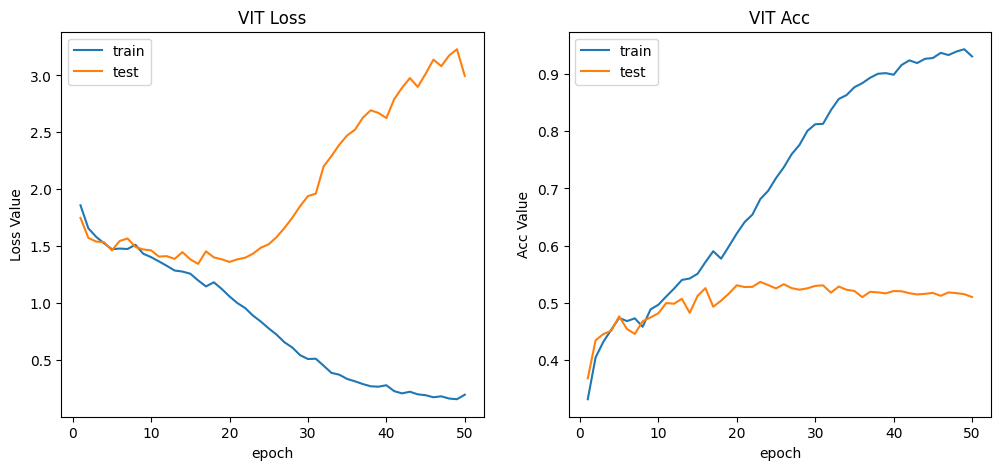

In [19]:
plot(pickle.load(open('Model/net.pkl', 'rb')), epochs=50, title = 'VIT')
plt.savefig(fname = 'Image/ret.png', dpi = 500)

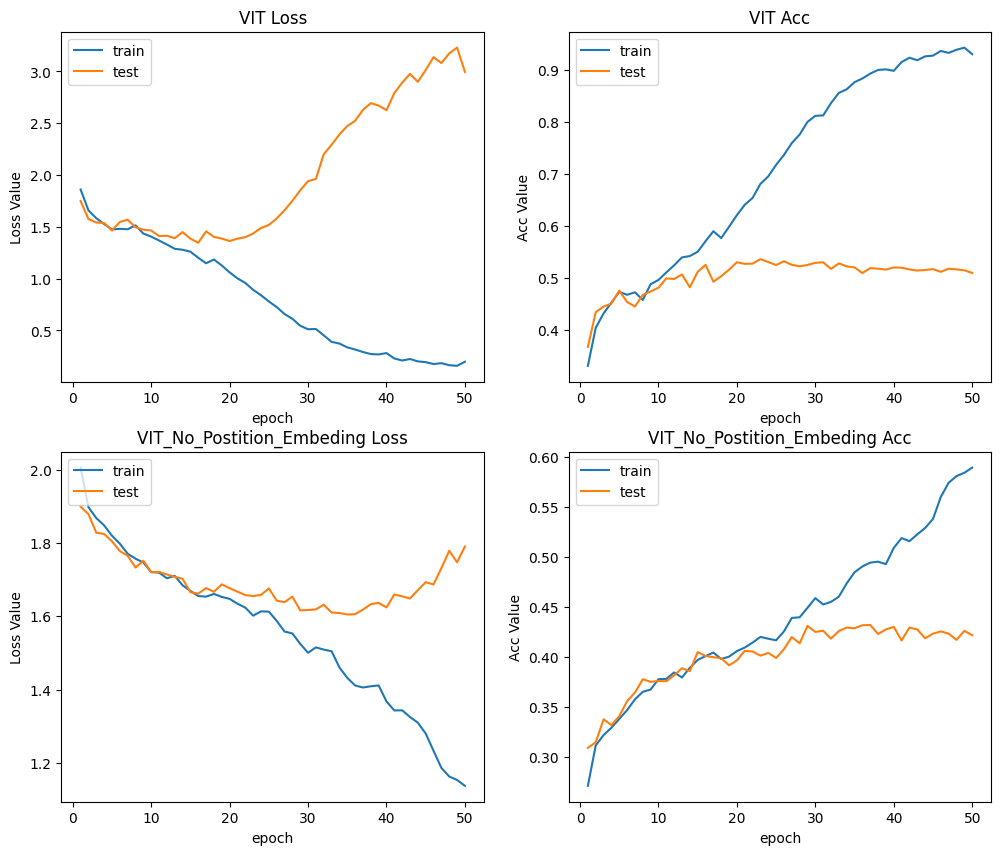

In [20]:
plot_2(pickle.load(open('Model/net.pkl', 'rb')), pickle.load(open('Model/net_no_postition_embeding.pkl', 'rb')), epochs=50, title1 = 'VIT', title2 = 'VIT_No_Postition_Embeding')
plt.savefig(fname = 'Image/ret_no_postition_embeding.png', dpi = 500)

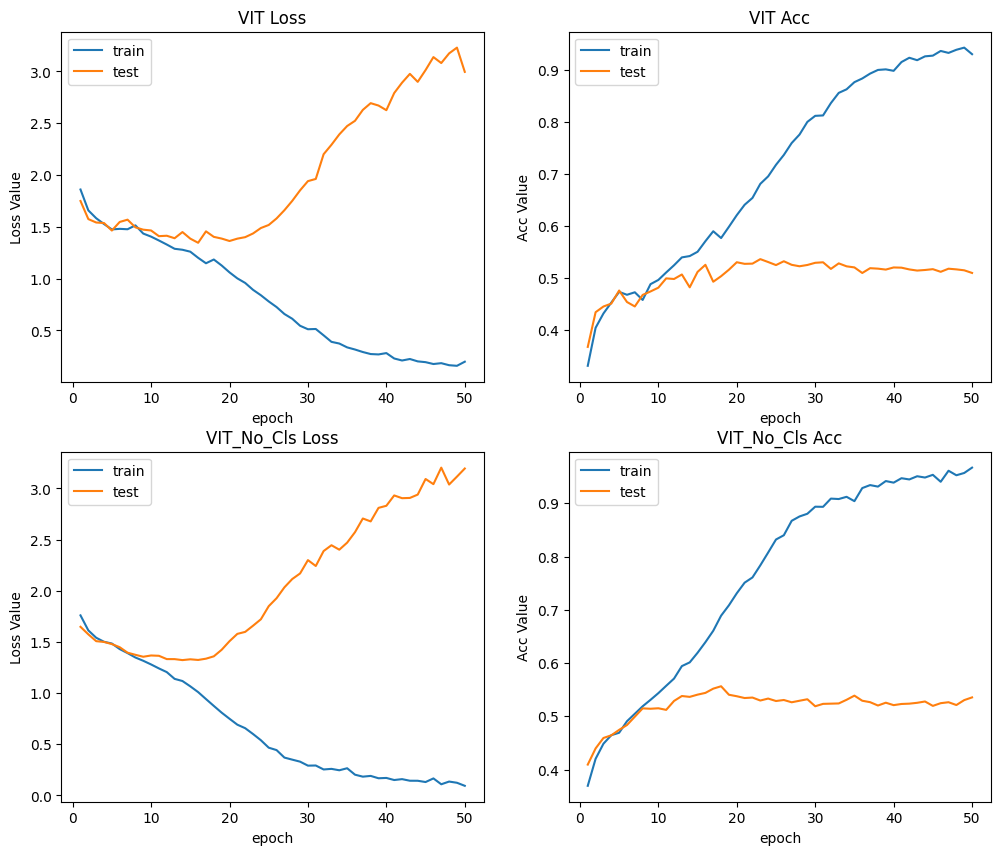

In [21]:
plot_2(pickle.load(open('Model/net.pkl', 'rb')), pickle.load(open('Model/net_no_cls.pkl', 'rb')), epochs=50, title1 = 'VIT', title2 = 'VIT_No_Cls')
plt.savefig(fname = 'Image/ret_no_cls.png', dpi = 500)

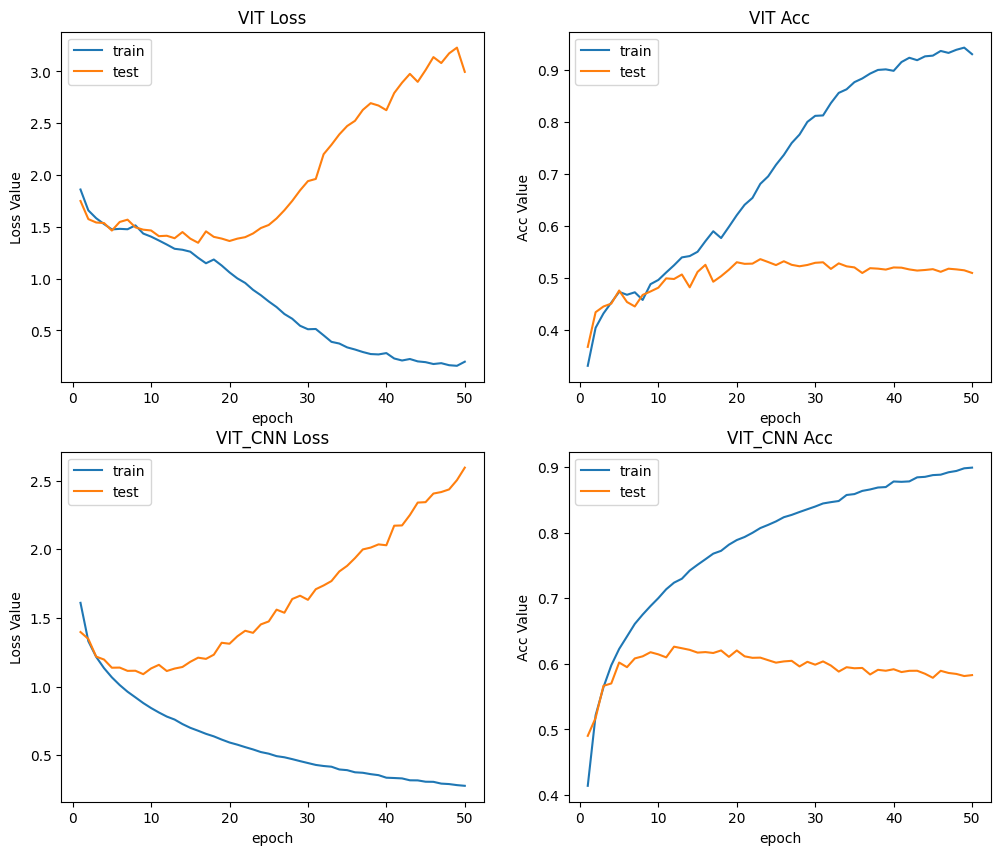

In [22]:
plot_2(pickle.load(open('Model/net.pkl', 'rb')), pickle.load(open('Model/net_cnn.pkl', 'rb')), epochs=50, title1 = 'VIT', title2 = 'VIT_CNN')
plt.savefig(fname = 'Image/ret_cnn.png', dpi = 500)